## 2.2 신경망을 위한 데이터 표현
텐서(tensor)  
- 다차원 넘파이 배열  
- 머신 러닝의 기본 구성 요소  
- 데이터를 위한 컨테이너(거의 항상 수치형 데이터를 다루기 있음)  
- 임의의 차원 개수를 가지는 행렬의 일반화된 모습  
(행렬 : 2D 텐서, 차원 = 축)

### 2.2.1 스칼라(0D 텐서)

스칼라 (= 스칼라 텐서, 0차원 텐서, 0D 텐서)
- 하나의 숫자만 담고 있는 텐서
- 축 개수(=rank) : 0

In [3]:
import numpy as np
x = np.array(12)
x

array(12)

In [4]:
x.ndim # 넘파이 배열의 축 개수 확인 가능

0

### 2.2.2 벡터(1D 텐서)

벡터 (= 1D 텐서)
- 숫자의 배열
- 축 개수 : 1

In [5]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [6]:
x.ndim # 축 개수 확인

1

- 위의 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터
- 5D 벡터(5개의 차원)와 5D 텐서(5개의 축)는 다르다!
- 차원수(dimensionality)는 특정 축을 따라 놓인 원ㅅ노의 개수이거나 텐서의 축 개수를 의미한다.

### 2.2.3 행렬(2D 텐서)

행렬 (= 2D 텐서)
- 벡터의 배열
- 축 개수 : 2(행, 열)

In [8]:
x = np.array([[5,78,2,3,0],
             [6,79,3,35,1],
             [7,80,4,36,2]])
x.ndim

2

### 2.2.4 3D 텐서와 고차원 텐서


In [12]:
x = np.array([[[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]]])
x.ndim

3

###  2.2.5 텐서의 핵심 속성

1. 축의 개수(랭크) 


2. 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파있너의 튜플(tuple)  
    ex. 2.2.4 예시
    - 행렬의 크기 : (3,5)
    - 3D 텐서의 크기 : (3,3,5)
    - 벡터의 크기 : (5,)처럼 1개의 원소로 이루어진 튜플
    
    
3. 데이터 타입 : 텐서에 포함된 데이터의 타입  
    ex. float32, uint8, float 64 등  
    - 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하기 때문에 넘파이 배열은 가변 길이의 문자열을 지원하지 않는다.  

In [15]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

print(train_images.ndim) # 축의 개수

3


In [16]:
print(train_images.shape) # 배열의 크기

(60000, 28, 28)


In [18]:
print(train_images.dtype) # 데이터 타입

uint8


- 8비트 정수형 3D 텐서  
( 28 * 28 크기의 정수 행렬 6만 개가 있는 배열)
- 각 행렬은 하나의 흑백 이미지이며 행렬의 각 원소는 0부터 255 사이의 값을 가진다.

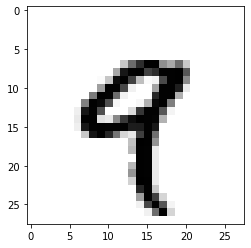

In [21]:
digit = train_images[4] # 다섯 번째 이미지

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.6 넘파이로 텐서 조작하기

In [23]:
my_slice = train_images[10:100]
print(my_slice.shape) # (90,28,28) 크기의 배열

(90, 28, 28)


In [25]:
my_slice = train_images[10:100, :, :] # :(콜론)은 전체 인덱스를 선택
print(my_slice.shape)

(90, 28, 28)


In [26]:
# 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정
my_slice = train_images[10:100, 0:28, 0:28] 
print(my_slice.shape)

(90, 28, 28)


In [27]:
# 14 * 14 픽셀 선택
my_slice = train_images[:,14:,14:]

### 2.2.7 배치 데이터

- 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축(sample axis)이다.(샘플 차원이라고도 한다)  
- 딥러닝 모델은 한 번에 전체 데이터 셋을 처리하지 않는 대신 데이터를 작은 배치(batch)로 나눈다.  

In [31]:
batch = train_images[:128]
batch = train_images[128:256] # 다음 배치
# batch = train_images[128*n : 128*(n+1)] # n번째 배치

- 배치 데이터를 다룰 때 첫 번쨰 축(0번 축)을 배치 축(batch axis) 또는 배치 차원(batch dimension)이라 부르다.

### 2.2.8 텐서의 실제 사례

1. 벡터 데이터 : (samples, features) 크기의 2D 텐서  
2. 시계열 데이터 또는 시퀀스(sequence) 데이터 : (samples, timesteps, features) 크기의 3D 텐서  
3. 이미지 : (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서  
4. 동영상 : (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서     

### 2.2.9 벡터 데이터
- 첫 번째 축 : 샘플 축, 두 번쨰 축 : 특성 축  
ex. 사람의 나이, 우편 번호, 소득으로 구성된 10만명의 인구 통계 데이터  
-> (100000,3) 크기의 텐서에 저장될 수 있다.

### 2.2.10 시계열 데이터 또는 시퀀스 데이터

- 데이터에서 시간이 중요할 때는 시간 축을 포함한 3D 텐서로 저장
- 각 샘플은 벡터(2D 텐서)의 시퀀스로 인코딩되기 때문에 배치 데이터는 3D 텐서로 인코딩 될 예정 (아래 그림 참고)
- 관례적으로 시간 축은 항상 두 번째 축(인덱스가 1인 축)
<img src="https://tensorflowkorea.files.wordpress.com/2018/12/068.jpg?w=300&h=151">
- 관례적으로 시간의 흐름을 가로 방향으로 놓기 때문에 그림에서 시간 축이 세로 축(두번째 축)이 아닌 가로 축에 위치해 있다.(편의상 텐서 축의 순서와 맞지 않게 그려져 있음)

예시
1. 주식 가격 데이터 셋 
 - 1분마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장 => 특성 : 3    
 - 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390,3) 크기의 2D 텐서로 인코딩된다.  
(하루의 거래 시간은 390분)  
 - 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있다.  
(1일치 데이터 : 하나의 샘플)  


2. 트윗 데이터 셋 
 - 각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스  
 - 각 문자가 128개의 크기인 이진 벡터로 인코딩될 수 있다. (여기서 이진 벡터는 해당 문자의 인덱스만 1이고 나머지는 모두 0인 벡터)  
 - 각 트윗은 (280, 128) 크기의 2D 텐서로 인코딩될 수 있다. (특성 : 128)  
 - 100만 개의 트윗으로 구성된 데이터셋은 (1000000,280,128) 크기의 3D 텐서에 저장

### 2.2.11 이미지 데이터

1. 이미지
  - 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 구성  
  - 흑백 이미지는 하나의 컬러 채널만을 가지기 때문에 2D 텐서로 저장될 수 있지만 관례상 이미지 텐서는 항상 3D로 저장(흑백 이미지인 경우 컬러 채널의 크기는 1)  
ex. 256 * 256 크기의 흑백 이미지에 대한 128개의 배치 : (128,256,256,1) 크기의 텐서  
ex. 컬러 이미지에 대한 128개의 배치 : (128,256,256,3) 크기의 텐서  

<img src="https://tensorflowkorea.files.wordpress.com/2018/12/069.jpg?w=300&h=287">
[그림] 4D 이미지 데이터 텐서(채널 우선 표기)


2. 이미지 텐서의 크기를 지정하는 방식  
  (1) 채널 마지막(channel-last) 방식  
   - 텐서플로에서 사용  
   - (samples, height, width, color_depth) : 컬러 채널의 깊이를 마지막에
  
  (2) 채널 우선(channel-first) 방식  
   - 씨아노에서 사용  
   - (samples, color_depth, height, width) : 컬러 채널의 깊이를 배치 축(=샘플 축)
     ex. (128, 1, 256, 256)
      
     
- 케라스 프레임워크는 두 형식을 모두 지원

### 2.2.12 비디오 데이터

- 5D 텐서
- 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지이다.
  + 프레임 : (height, width, color_depth) 3D 텐서
  + 프레임의 연속 : (frames, height, width, color_depth) 4D 텐서
  + 여러 비디오의 배치 : (samples, frames, height, width, color_depth) 5D 텐서  
  ex. 60초짜리 144 * 256 비디오 클립을 초당 4 프레임으로 샘플링하면 240프레임이 된다
    - 위의 비디오 클립을 4개 가진 배치 : (4, 240, 144, 256, 3) 크기의 텐서에 저장